In [216]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

Funcitons are defined here which allow for the area up to a particular stress to be calculated and graphed

In [217]:
def find_threshold(sigmax,stress):
    i = 0 
    while sigmax > stress[i]:
        i = i + 1
    return i - 1


def linear_interp(stress,strain,sigmax,threshold):
    final_strain = ((strain[threshold+1]-strain[threshold]) * (sigmax-stress[threshold]) / (stress[threshold+1] - stress[threshold])) + strain[threshold]
    return final_strain

def area_up_to_sigmax(stress,strain,sigmax):
    threshold = find_threshold(sigmax,stress)
    work_strain, work_stress = strain[0:threshold] , stress[0:threshold]
    final_strain = linear_interp(stress,strain,sigmax,threshold)
    work_strain = np.append(work_strain,final_strain)
    work_stress = np.append(work_stress,sigmax)
    area = 0 
    for i in range(len(work_strain)-1):
        area += (work_strain[i+1]-work_strain[i])*(work_stress[i+1]+work_stress[i])/2
    return area,final_strain
        

Force displacement data is read in from csv file produced by the instrong testing device

(0.0, 20.0)

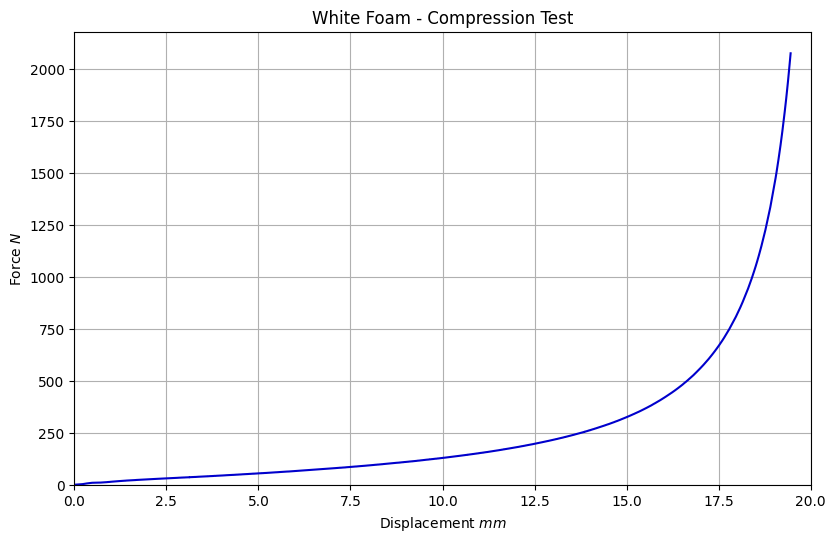

In [218]:
F_dis_white = genfromtxt('white_foam.csv',delimiter=',')
plt.figure(figsize=(9.5,6),dpi=100)
plt.grid()
plt.plot(F_dis_white[:,0],F_dis_white[:,1],'-',linewidth=1.5,color = [0, 0, 0.8])
plt.xlabel('Displacement $mm$')
plt.ylabel('Force $N$')
plt.title('White Foam - Compression Test')
plt.ylim(0,F_dis_white[:,1][-1]*1.05)
plt.xlim(0,20)

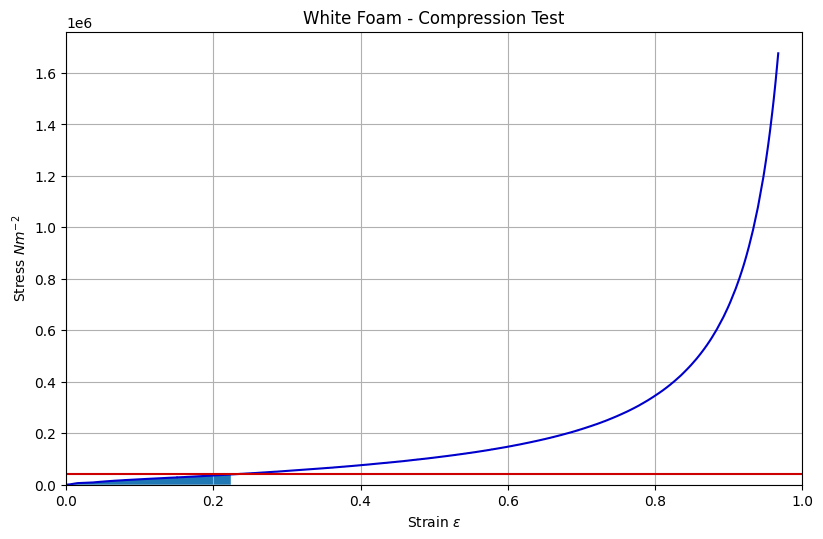

The error in the stress value by using the data point just below
0.4576668282436549%
First shows stress strain of datapoint just below desired, then the linear interpolation point
0.223824  39816.93326870254
0.2239697465204555 40000.0
Area of graph up to sigma max
4931.101331195892


In [219]:

sigmax = 0.04e6
strain_white = (F_dis_white[14:,0] - 0.10827) *(1/20)
stress_white = (F_dis_white[14:,1] - 0.92613) *(1/(1237.8e-6))
threshold = find_threshold(sigmax,stress_white)
area , final_strain = area_up_to_sigmax(stress_white,strain_white,sigmax)

x = np.arange(0,1,0.001)
max_stress = np.ones(len(x))*sigmax
plt.figure(figsize=(9.5,6),dpi=100)
plt.grid()
plt.plot(strain_white,stress_white,'-',linewidth=1.5,color = [0, 0, 0.8])
plt.plot(x,max_stress,'-',linewidth=1.5,color =[0.8,0,0])
plt.xlabel('Strain $\epsilon$')
plt.ylabel('Stress $Nm^{-2}$')
plt.title('White Foam - Compression Test')
plt.ylim(0,1.05*stress_white[-1])
plt.xlim(0,1)
plt.fill_between(strain_white,stress_white, where=(strain_white <= final_strain))
plt.show()

print('The error in the stress value by using the data point just below')
print(str(100*(sigmax - stress_white[threshold])/(sigmax)) + '%')
print('First shows stress strain of datapoint just below desired, then the linear interpolation point')
print(str(strain_white[threshold]) + '  ' +  str(stress_white[threshold]))
print(final_strain,sigmax)
print('Area of graph up to sigma max')
print(area)


Stress Strain for Ethafoam

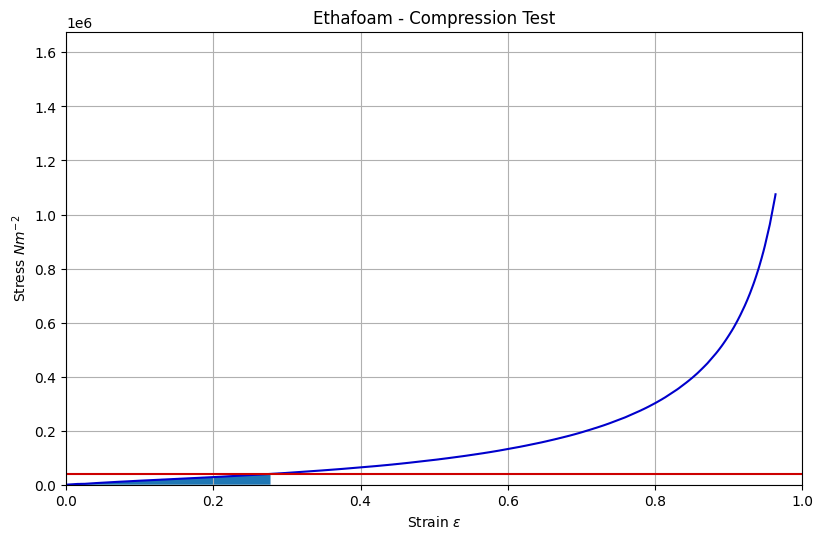

5544.427511118777


In [220]:
F_dis_etha = genfromtxt('Ethafoam.csv',delimiter=',')

strain_etha = (F_dis_etha[21:,0]-0.06648) *(1/27)
stress_etha = (F_dis_etha[21:,1]-0.97544) *(1/(2.0228e-3))
threshold = find_threshold(sigmax,stress_etha)
area , final_strain = area_up_to_sigmax(stress_etha,strain_etha,sigmax)

x = np.arange(0,1,0.001)
max_stress = np.ones(len(x))*sigmax
plt.figure(figsize=(9.5,6),dpi=100)
plt.grid()
plt.plot(strain_etha,stress_etha,'-',linewidth=1.5,color = [0, 0, 0.8])
plt.plot(x,max_stress,'-',linewidth=1.5,color =[0.8,0,0])
plt.xlabel('Strain $\epsilon$')
plt.ylabel('Stress $Nm^{-2}$')
plt.title('Ethafoam - Compression Test')
plt.ylim(0,stress_white[-1])
plt.xlim(0,1)
plt.fill_between(strain_etha,stress_etha, where=(strain_etha <= final_strain))
plt.show()
print(area)

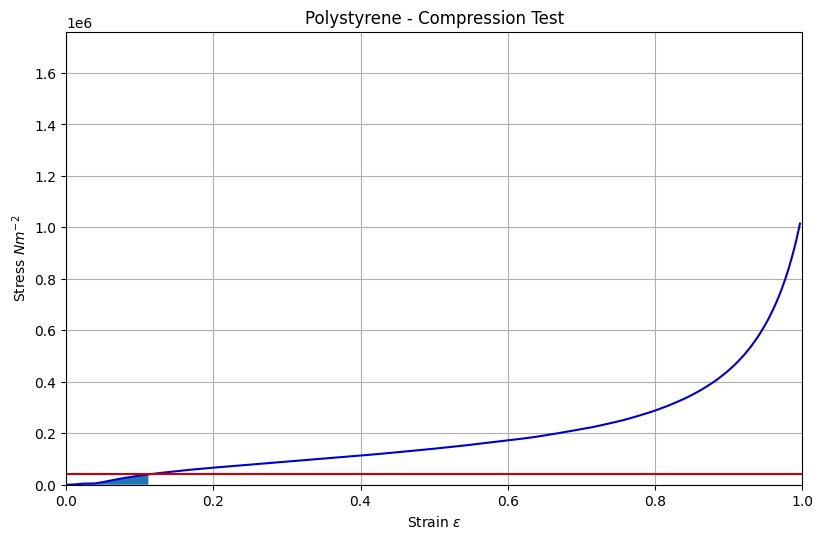

1821.9260690486803


In [221]:
F_dis_sty = genfromtxt('Polystyrene.csv',delimiter=',')

strain_sty = (F_dis_sty[54:,0] - 0.35196) *(1/13.5)
stress_sty = (F_dis_sty[54:,1]-1.17902) *(1/(2.0228e-3)) 
threshold = find_threshold(sigmax,stress_sty)
area , final_strain = area_up_to_sigmax(stress_sty,strain_sty,sigmax)

x = np.arange(0,1,0.001)
max_stress = np.ones(len(x))*sigmax
plt.figure(figsize=(9.5,6),dpi=100)
plt.grid()
plt.plot(strain_sty,stress_sty,'-',linewidth=1.5,color = [0, 0, 0.8])
plt.plot(x,max_stress,'-',linewidth=1.5,color =[0.8,0,0])
plt.xlabel('Strain $\epsilon$')
plt.ylabel('Stress $Nm^{-2}$')
plt.title('Polystyrene - Compression Test')
plt.ylim(0,1.05*stress_white[-1])
plt.xlim(0,1)
plt.fill_between(strain_sty,stress_sty, where=(strain_sty <= final_strain))
plt.show()
print(area)

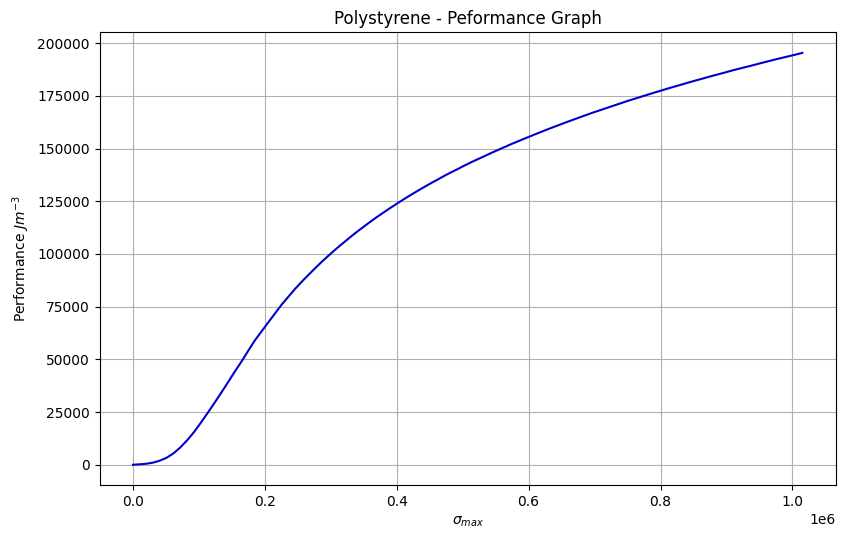

In [222]:
def performance_vs_sigmax(stress,strain):
    sigs = np.linspace(stress[10],stress[-1],100)
    performance = np.zeros(len(sigs))
    for i in range(len(sigs)):
        performance[i] = area_up_to_sigmax(stress,strain,sigs[i])[0]
    return sigs,performance

sigs_sty, performance_sty = performance_vs_sigmax(stress_sty,strain_sty)

plt.figure(figsize=(9.5,6),dpi=100)
plt.grid()
plt.plot(sigs_sty,performance_sty,'-',linewidth=1.5,color = [0, 0, 0.8])
plt.xlabel('$\sigma_{max}$')
plt.ylabel('Performance $Jm^{-3}$')
plt.title('Polystyrene - Peformance Graph')
plt.show()

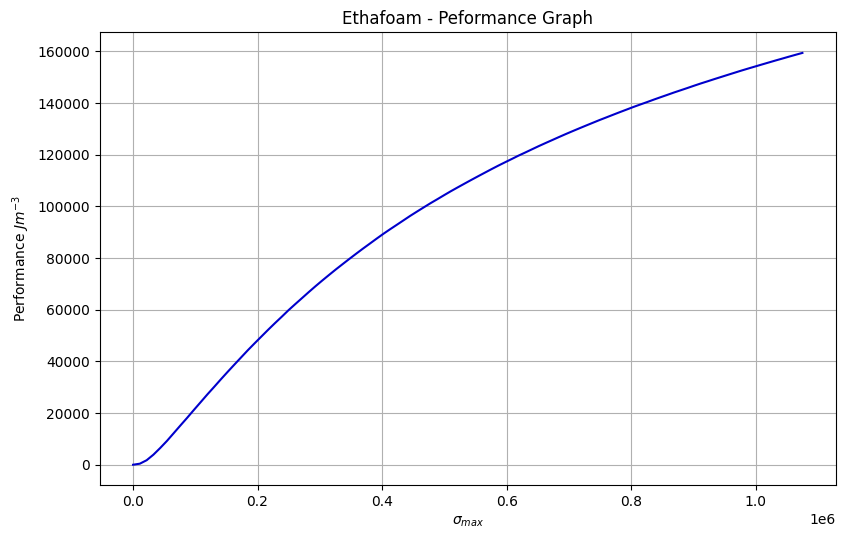

In [223]:
sigs_etha, performance_etha = performance_vs_sigmax(stress_etha,strain_etha)

plt.figure(figsize=(9.5,6),dpi=100)
plt.grid()
plt.plot(sigs_etha,performance_etha,'-',linewidth=1.5,color = [0, 0, 0.8])
plt.xlabel('$\sigma_{max}$')
plt.ylabel('Performance $Jm^{-3}$')
plt.title('Ethafoam - Peformance Graph')
plt.show()


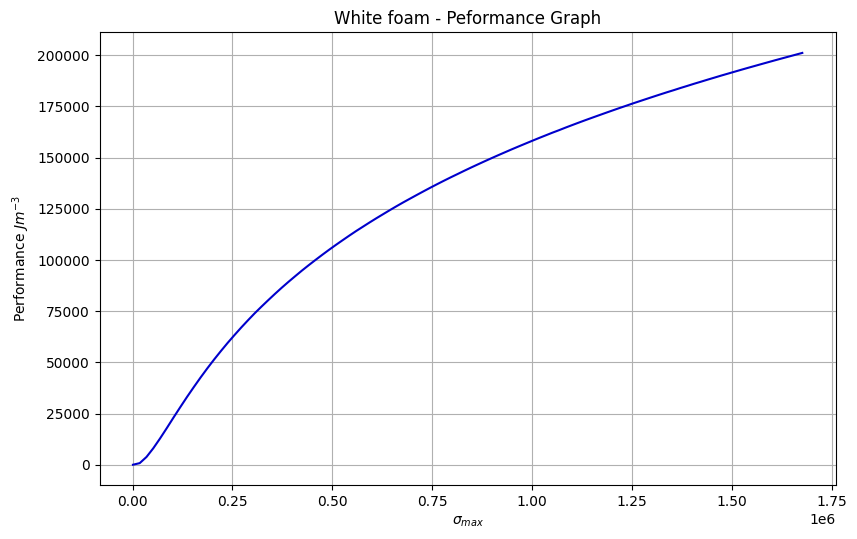

In [224]:
sigs_white, performance_white = performance_vs_sigmax(stress_white,strain_white)

plt.figure(figsize=(9.5,6),dpi=100)
plt.grid()
plt.plot(sigs_white,performance_white,'-',linewidth=1.5,color = [0, 0, 0.8])
plt.xlabel('$\sigma_{max}$')
plt.ylabel('Performance $Jm^{-3}$')
plt.title('White foam - Peformance Graph')
plt.show()

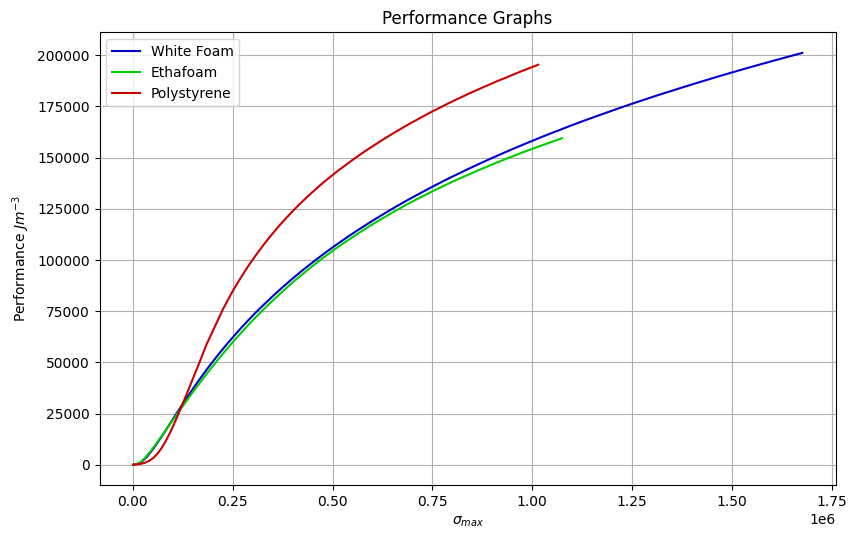

In [228]:
plt.figure(figsize=(9.5,6),dpi=100)
plt.grid()
plt.plot(sigs_white,performance_white,'-',linewidth=1.5,color = [0, 0, 0.8],label= 'White Foam')
plt.plot(sigs_etha,performance_etha,'-',linewidth=1.5,color = [0, 0.8, 0],label = 'Ethafoam')
plt.plot(sigs_sty,performance_sty,'-',linewidth=1.5,color = [0.8, 0, 0],label='Polystyrene')
plt.xlabel('$\sigma_{max}$')
plt.ylabel('Performance $Jm^{-3}$')
plt.title('Performance Graphs')
plt.legend()
plt.show()

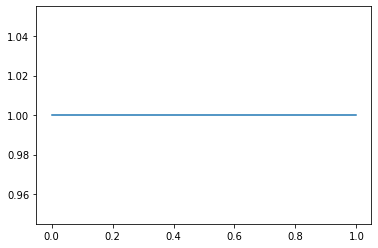

In [226]:
x = np.arange(0,1,0.001)
y = np.ones(len(x))
plt.plot(x,y)
plt.show()

In [227]:
sigmax =  12.5
stress = [5,10,15,20,25]
strain = [0,2,4,6,8]
u = find_threshold(sigmax, stress)
print(u)
print(stress[u])


u = linear_interp(stress,strain,12.5,u)
print(u)

green = np.array([1,2,3])
green = np.append(green,4)
print(green)
a = 0 
for i in range(len(stress)-1):
    a += (strain[i+1] - strain[i])*(stress[i+1]+stress[i])/2

print(a)
b = np.trapz(stress,strain)
print(b)

1
10
3.0
[1 2 3 4]
120.0
120.0


F_dis_white[:,0] = F_dis_white[:,0]/20
F_dis_white[:,1] = F_dis_white[:,1]/1400
plt.figure(figsize=(9.5,6),dpi=100)
plt.grid()
plt.plot(F_dis_white[:,0],F_dis_white[:,1],'-',linewidth=1.5,color = [0, 0, 0.8])
plt.xlabel('Displacement $mm$')
plt.ylabel('Force $N$')
plt.title('White Foam - Compression Test')
plt.ylim(0,2200)